# UTS - Polynomial Linear Regression

Load Boston Housing Price sebagai sample dataset pada Scikit Learn.

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Sample Dataset

Saya mengambil 2 features yaitu INDUS dan PTRATIO. Saya mengambil features INDUS dan PTRATIO karena saya ingin mengetahui prediksi harga rumah bila diketahui proposi hektar dan rasio murid guru.

+ Proporsi hektar dan rasio sebagai features.
+ Harga sebagai target.

### Training Dataset

In [4]:
import pandas as pd

rumah = {'proporsi hektar': [2.31, 7.07, 7.07, 2.18, 2.18], 
         'rasio': [15.3, 17.8, 17.8, 18.7, 18.7],
         'harga': [24, 21.6, 34.7, 33.4, 36.2]}

train_rumah_df = pd.DataFrame(rumah)
train_rumah_df

,proporsi hektar,rasio,harga
0,2.31,15.3,24.0
1,7.07,17.8,21.6
2,7.07,17.8,34.7
3,2.18,18.7,33.4
4,2.18,18.7,36.2


## Preprocessing Dataset

In [5]:
import numpy as np
X_train = np.array(train_rumah_df['proporsi hektar']).reshape(-1, 1)
y_train = np.array(train_rumah_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[2.31]
 [7.07]
 [7.07]
 [2.18]
 [2.18]]

y_train: [24.  21.6 34.7 33.4 36.2]


## Polynomial Regression: Cubic

### Polynomial Features

In [6]:
from sklearn.preprocessing import PolynomialFeatures

cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)

print(f'X_train_cubic:\n{X_train_cubic}\n')

X_train_cubic:
[[  1.         2.31       5.3361    12.326391]
 [  1.         7.07      49.9849   353.393243]
 [  1.         7.07      49.9849   353.393243]
 [  1.         2.18       4.7524    10.360232]
 [  1.         2.18       4.7524    10.360232]]



+ 1 diperoleh dari nilai x dipangkatkan 0.
+ 2.31 diperoleh dari nilai x dipangkatkan 1.
+ 5.3361 diperoleh dari nilai x dipangkatkan 2.
+ 12.326391 diperoleh dari nilai x dipangkatkan 3.

### Training Model

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_cubic, y_train) # proses transformasi polynomial hanya dikenakan pada features

LinearRegression()

### Visualisasi Data

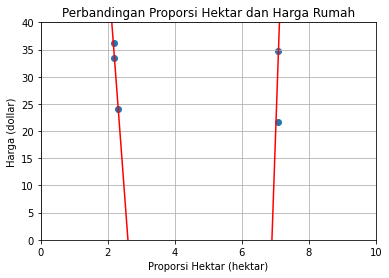

In [8]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0, 40, 100).reshape(-1, 1)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis_cubic = model.predict(X_vis_cubic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_cubic, '-r')

plt.title('Perbandingan Proporsi Hektar dan Harga Rumah')
plt.xlabel('Proporsi Hektar (hektar)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 10)
plt.ylim(0, 40)
plt.grid(True)
plt.show()

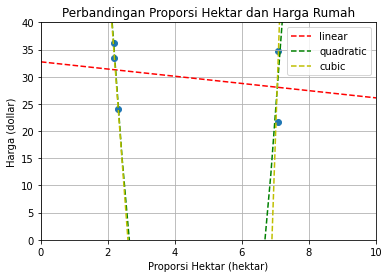

In [9]:
# Training Set
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 40, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label='quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Proporsi Hektar dan Harga Rumah')
plt.xlabel('Proporsi Hektar (hektar)')
plt.ylabel('Harga (dollar)')
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 40)
plt.grid(True)
plt.show()